## Pipeline:

##### 1. Dealing with data entry enrrors 
   


##### 2. Missing Values 
    Categorical
    Numerical
    DateTime

##### 3. Data Types
    Numerical
    Categorical

##### 4. Transformation
    Row deletion with respect to threshold
    Filling missing values of both categorical and numeric data
    Changing column types

##### 5. Outliers
    Dist Plots
    Box Plots

##### 6. Descrpitive Stats

    Bar charts
    Distribution 
    Heatmaps
    Scatter Plots
##### 7. Inferential Analysis

    T-Test
    Chi-Square Test
    ANOVA
    Tukey Test

##### 7. Inferential Analysis

    T
    Chi-Square Test
    ANOVA
    Tukey Test

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
#Read csv file
df = pd.read_csv("supermarket_sales_dirty.csv",encoding="unicode_escape")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3


In [3]:
#Get number of rows and columns
df.shape

(1000, 17)

In [4]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               905 non-null    object 
 1   Branch                   981 non-null    object 
 2   City                     996 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   991 non-null    object 
 5   Product line             995 non-null    object 
 6   Unit price               992 non-null    float64
 7   Quantity                 996 non-null    object 
 8   Tax 5%                   1000 non-null   float64
 9   Total                    997 non-null    object 
 10  Date                     1000 non-null   object 
 11  Time                     965 non-null    object 
 12  Payment                  991 non-null    object 
 13  cogs                     989 non-null    float64
 14  gross margin percentage  

# Dropping columns not useful for BI

In [5]:
#Dropping columns not useful for BI
#Dropping invoice ID since it provides no insight
#Dropping gross income as the column is repeated
#gross margin income is the same everywhere
#Time column has too many missing values
df.drop('Invoice ID', inplace=True, axis=1)
df.drop('gross income', inplace=True, axis=1)
df.drop('gross margin percentage', inplace=True, axis=1)
df.drop('Time', inplace=True, axis=1)

# Dealing with data entry error

In [6]:
print(df['Tax 5%'].value_counts().index.sort_values(ascending = False))
df['Quantity'].replace(['few%&','*(()','few','%*&'],np.nan,inplace = True)
print(df['Quantity'].value_counts().index.sort_values(ascending = False))

Float64Index([ 49.65,  49.49,  49.26,  48.75,  48.69, 48.685, 48.605,  47.79,
               47.72, 45.325,
              ...
              0.8875,  0.814,  0.775, 0.7715,  0.767,  0.699,  0.639,  0.627,
              0.6045, 0.5085],
             dtype='float64', length=990)
Index(['9', '8', '7', '6', '5', '4', '3', '2', '10', '1'], dtype='object')


In [7]:
print(df['Total'].value_counts().index.sort_values(ascending = False))
df['Total'].replace(['whoa','very high','toolow','$$$$$$$','#####'],np.nan,inplace = True)
print(df['Total'].value_counts().index.sort_values(ascending = False))

Index(['whoa', 'very high', 'toolow', '99.9075', '99.75', '99.54', '99.33',
       '98.049', '98.028', '97.881',
       ...
       '101.808', '101.64', '1003.59', '1002.12', '100.9155', '100.485',
       '100.128', '10.6785', '$$$$$$$', '#####'],
      dtype='object', length=987)
Index(['99.9075', '99.75', '99.54', '99.33', '98.049', '98.028', '97.881',
       '97.818', '97.419', '96.642',
       ...
       '102.396', '102.018', '101.808', '101.64', '1003.59', '1002.12',
       '100.9155', '100.485', '100.128', '10.6785'],
      dtype='object', length=982)


In [8]:
print(df['cogs'].value_counts().index.sort_values(ascending = False))

Float64Index([993.0, 989.8, 985.2, 975.0, 973.8, 973.7, 972.1, 955.8, 954.4,
              906.5,
              ...
              17.75, 16.28,  15.5, 15.43, 15.34, 13.98, 12.78, 12.54, 12.09,
              10.17],
             dtype='float64', length=980)


In [9]:
print(df['Rating'].value_counts().index.sort_values(ascending = False))

Float64Index([10.0,  9.9,  9.8,  9.7,  9.6,  9.5,  9.4,  9.3,  9.2,  9.1,  9.0,
               8.9,  8.8,  8.7,  8.6,  8.5,  8.4,  8.3,  8.2,  8.1,  8.0,  7.9,
               7.8,  7.7,  7.6,  7.5,  7.4,  7.3,  7.2,  7.1,  7.0,  6.9,  6.8,
               6.7,  6.6,  6.5,  6.4,  6.3,  6.2,  6.1,  6.0,  5.9,  5.8,  5.7,
               5.6,  5.5,  5.4,  5.3,  5.2,  5.1,  5.0,  4.9,  4.8,  4.7,  4.6,
               4.5,  4.4,  4.3,  4.2,  4.1,  4.0],
             dtype='float64')


In [10]:
print(df['Unit price'].value_counts().index.sort_values(ascending = False))


Float64Index([99.96, 99.92, 99.89, 99.83, 99.82, 99.79, 99.78, 99.73, 99.71,
               99.7,
              ...
              10.75, 10.69, 10.59, 10.56, 10.53, 10.18, 10.17, 10.16, 10.13,
              10.08],
             dtype='float64', length=935)


In [11]:
print(df['Payment'].value_counts().index.sort_values(ascending = True))
df['Payment'].replace(['123','332','444','98'],np.nan,inplace = True)
print(df['Payment'].value_counts().index.sort_values(ascending = True))

Index(['123', '332', '444', '98', 'Cash', 'Credit card', 'Ewallet'], dtype='object')
Index(['Cash', 'Credit card', 'Ewallet'], dtype='object')


# Changing data type and renaming columns

In [12]:
#Quantity and total are numeric columns
df["Quantity"] = df.Quantity.astype(float)
df["Total"] = df.Total.astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         981 non-null    object 
 1   City           996 non-null    object 
 2   Customer type  1000 non-null   object 
 3   Gender         991 non-null    object 
 4   Product line   995 non-null    object 
 5   Unit price     992 non-null    float64
 6   Quantity       992 non-null    float64
 7   Tax 5%         1000 non-null   float64
 8   Total          992 non-null    float64
 9   Date           1000 non-null   object 
 10  Payment        987 non-null    object 
 11  cogs           989 non-null    float64
 12  Rating         994 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.7+ KB


In [14]:
#Tax and Fross income are the same so we are keeping one of them
df = df.rename(columns={'Tax 5%': 'Gross income'})
df = df.rename(columns={'cogs': 'Cost of goods sold'})

In [15]:
#Checking correlation between columns to help in filling null values
df.apply(lambda x: x.factorize()[0]).corr()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating
Branch,1.000000,0.832118,-0.016495,-0.021603,0.019944,0.003848,0.035102,-0.010435,-0.004535,0.005660,0.014796,-0.002255,-0.014184
City,0.832118,1.000000,0.001157,-0.007284,0.021962,-0.017618,0.035577,-0.036147,-0.029569,-0.007672,0.045453,-0.029989,-0.015313
Customer type,-0.016495,0.001157,1.000000,0.032801,-0.006069,-0.031447,-0.043015,-0.023232,-0.031326,-0.054447,-0.070737,-0.023803,-0.012000
Gender,-0.021603,-0.007284,0.032801,1.000000,-0.047812,-0.048562,0.016474,-0.043849,-0.041922,0.018380,-0.058124,-0.040665,0.033463
Product line,0.019944,0.021962,-0.006069,-0.047812,1.000000,-0.043675,0.038927,-0.041397,-0.039355,0.041367,0.010798,-0.042004,-0.050189
Unit price,0.003848,-0.017618,-0.031447,-0.048562,-0.043675,1.000000,0.006249,0.914121,0.905853,0.130221,-0.025071,0.894756,0.102974
Quantity,0.035102,0.035577,-0.043015,0.016474,0.038927,0.006249,1.000000,0.035128,0.041833,0.110341,-0.007186,0.030738,-0.016396
Gross income,-0.010435,-0.036147,-0.023232,-0.043849,-0.041397,0.914121,0.035128,1.000000,0.992040,0.162407,-0.040061,0.980894,0.094778
Total,-0.004535,-0.029569,-0.031326,-0.041922,-0.039355,0.905853,0.041833,0.992040,1.000000,0.156044,-0.035156,0.972944,0.090345
Date,0.005660,-0.007672,-0.054447,0.018380,0.041367,0.130221,0.110341,0.162407,0.156044,1.000000,-0.029299,0.159085,0.047727


<AxesSubplot:>

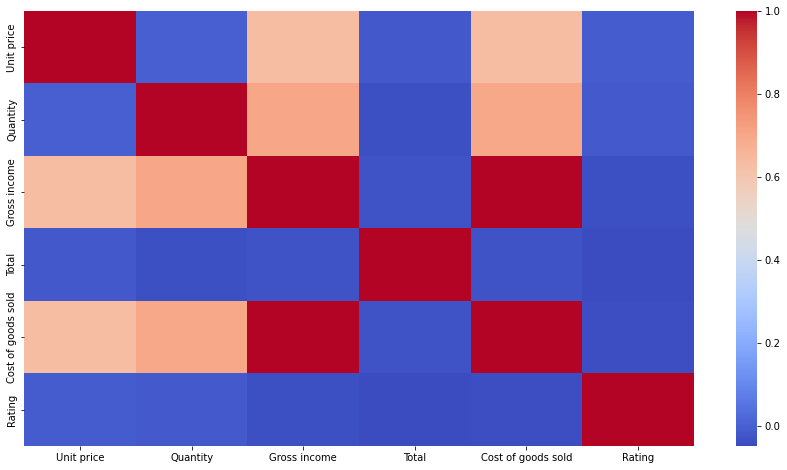

In [16]:
#heatmap for correlation
fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches
sns.heatmap(df.corr(), cmap= 'coolwarm')

# Dealing with null values

In [17]:
df.isnull().sum()

Branch                19
City                   4
Customer type          0
Gender                 9
Product line           5
Unit price             8
Quantity               8
Gross income           0
Total                  8
Date                   0
Payment               13
Cost of goods sold    11
Rating                 6
dtype: int64

<AxesSubplot:>

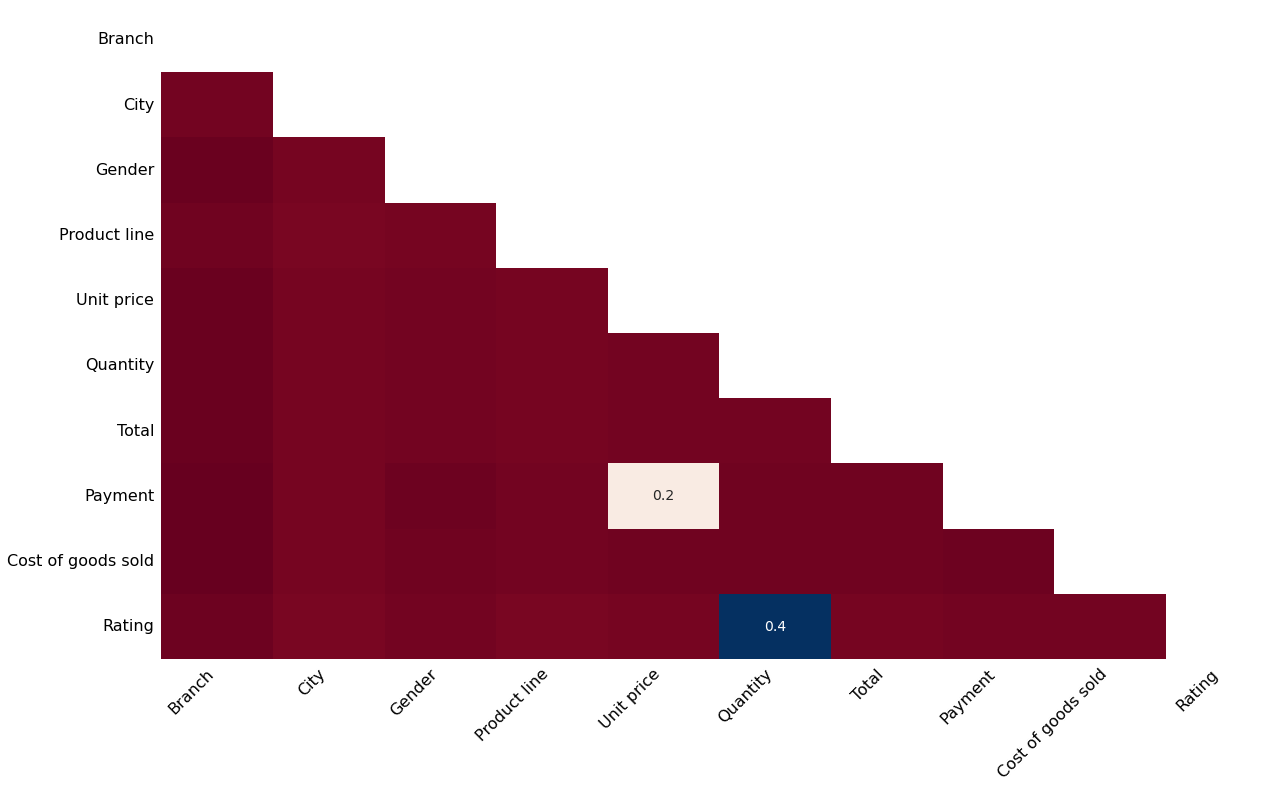

In [18]:
msno.heatmap(df)

In [19]:
#Checking null values
df.isna()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False,False
996,False,False,False,False,False,False,False,False,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False,False,True,False,False
998,False,False,False,False,False,True,False,False,False,False,True,False,False


In [20]:
#As city and branch number signify same thing, we eliminate the branch column.
#We fill the missing values in City through branch
df['City'].fillna(df['Branch'], inplace=True)
df['Branch'].fillna(df['City'], inplace=True)
df["City"].replace({"A": "Yangon", "B": "Mandalay", "C": "Naypyitaw"}, inplace=True)

In [21]:
#We do not need branch as city does same thing as branch
df.drop('Branch', inplace=True, axis=1)

<AxesSubplot:>

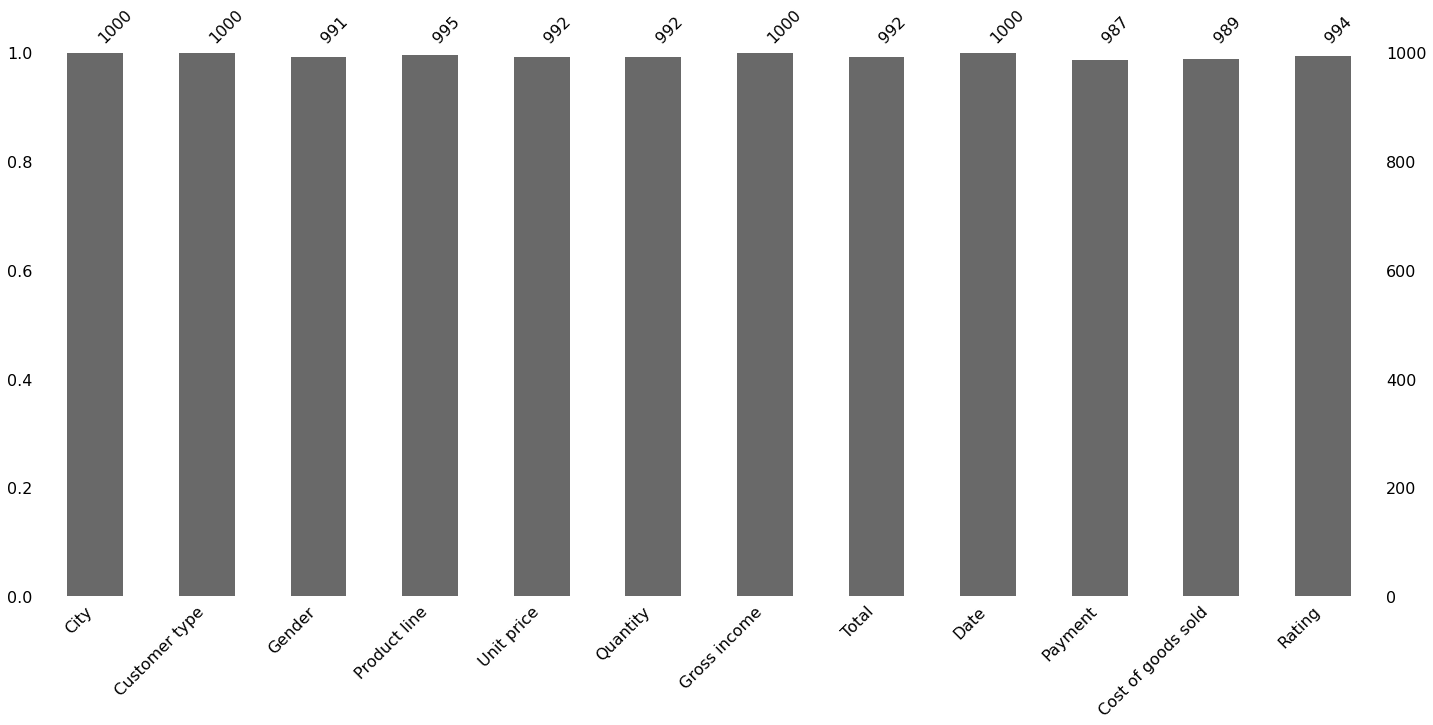

In [22]:
msno.bar(df)

# Used highly correlated columns to fill missing values

In [23]:
#In the lines below, we have filled out null values according to the mode of the highly correlated columns
df[(df['Product line'] == 'Home and lifestyle')]['Gender'].mode()

0    Male
dtype: object

In [24]:
df['Gender'] = df['Gender'].mask((df['Gender'].isnull()) & (df['Product line'] == 'Home and lifestyle'), 'Male')

In [25]:
df[(df['Product line'] == 'Food and beverages')]['Gender'].mode()

0    Female
dtype: object

In [26]:
df['Gender'] = df['Gender'].mask((df['Gender'].isnull()) & (df['Product line'] == 'Food and beverages'), 'Female')

In [27]:
df[(df['Product line'] == 'Health and beauty')]['Gender'].mode()

0    Male
dtype: object

In [28]:
df['Gender'] = df['Gender'].mask((df['Gender'].isnull()) & (df['Product line'] == 'Health and beauty'), 'Male')

In [29]:
df[(df['Product line'] == 'Electronic accessories')]['Gender'].mode()

0    Male
dtype: object

In [30]:
df['Gender'] = df['Gender'].mask((df['Gender'].isnull()) & (df['Product line'] == 'Electronic accessories'), 'Male')

In [31]:
df[(df['Product line'] == 'Electronic accessories')]['Gender'].mode()

0    Male
dtype: object

In [32]:
#city ke hisab se
df[(df['Gender'] == 'Male')]['Product line'].mode()

0    Health and beauty
dtype: object

In [33]:
df['Product line'] = df['Product line'].mask((df['Product line'].isnull()) & (df['Gender'] == 'Male'), 'Health and beauty')

In [34]:
#city ke hisab se
df[(df['Gender'] == 'Female')]['Product line'].mode()

0    Fashion accessories
dtype: object

In [35]:
df['Product line'] = df['Product line'].mask((df['Product line'].isnull()) & (df['Gender'] == 'Female'), 'Fashion accessories')

# Dealing with missing values in numeric columns through calculation

In [36]:
#These are the indexes where Cost of goods sold column has null values
cost = df[df['Cost of goods sold'].isnull()].index.tolist()
print(cost)
# replacing the null values with calculated values using corresponding row index
for index in cost:
    df.loc[index,'Cost of goods sold'] = ((df.loc[index,'Total'])*(df.loc[index,'Gross income']))

[142, 143, 144, 450, 451, 452, 453, 454, 842, 843, 844]


In [37]:
#These are the indexes where Gross income column has null values
income = df[df['Gross income'].isnull()].index.tolist()
print(income)
# replacing the null values with calculated values using corresponding row index
for index in income:
    df.loc[index,'Gross income'] = ((df.loc[index,'Total'])-(df.loc[index,'cogs']))


[]


In [38]:
unit = df[df['Unit price'].isnull()].index.tolist()
print(unit)
for index in unit:
    df.loc[index,'Unit price'] = (df.loc[index,'Total']/(df.loc[index,'Quantity']))

[8, 9, 484, 485, 979, 980, 998, 999]


In [39]:
quant = df[df['Quantity'].isnull()].index.tolist()
print(quant)
for index in quant:
    df.loc[index,'Quantity'] = (df.loc[index,'Total']/(df.loc[index,'Unit price']))

[57, 58, 59, 60, 223, 244, 357, 381]


In [40]:
total = df[df['Total'].isnull()].index.tolist()
print(total)
for index in total:
    df.loc[index,'Total'] = ((df.loc[index,'Quantity'])*(df.loc[index,'Unit price']))

[306, 391, 394, 395, 396, 412, 433, 518]


# Dealing with other columns

In [41]:
#Rating is better to be filled with mean
df['Rating'].fillna((df['Rating'].mean()), inplace=True)

In [42]:
#payment being a categorical variable should be filled with mode
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)

In [43]:
df.isnull().any(axis = 1).sum() #total number of rows with missing data

0

In [44]:
df.isnull().sum()

City                  0
Customer type         0
Gender                0
Product line          0
Unit price            0
Quantity              0
Gross income          0
Total                 0
Date                  0
Payment               0
Cost of goods sold    0
Rating                0
dtype: int64

# Dealing with Date

In [45]:
#Splitting date to fill missing values
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating,Month,Day,Year
0,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,Ewallet,522.83,9.1,1,5,2019
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,Cash,76.40,9.6,3,8,2019
2,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,Credit card,324.31,7.4,3,3,2019
3,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,Ewallet,465.76,8.4,1,27,2019
4,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,Ewallet,604.17,5.3,2,8,2019


In [46]:
#Replacing missing values with np.nan
df['Month'].replace('',np.nan,inplace = True)
df['Day'].replace('',np.nan,inplace = True)
df['Year'].replace('',np.nan,inplace = True)
df.isnull().sum()

City                  0
Customer type         0
Gender                0
Product line          0
Unit price            0
Quantity              0
Gross income          0
Total                 0
Date                  0
Payment               0
Cost of goods sold    0
Rating                0
Month                 1
Day                   3
Year                  3
dtype: int64

In [47]:
#replacing with year in data set
df['Year'].replace(np.nan,'2019',inplace = True)

In [48]:
df['Day'].fillna(df['Day'].mode()[0], inplace=True)
df['Month'].fillna(df['Year'].mode()[0], inplace=True)

In [49]:
#joining date in datetime format
df['Date']=(df[['Year', 'Month','Day']].T.agg('-'.join))

In [50]:
#Dropping splitted columns
df.drop('Year', inplace=True, axis=1)
df.drop('Month', inplace=True, axis=1)
df.drop('Day', inplace=True, axis=1)
#df.drop('Time', inplace=True, axis=1)

In [51]:
#Fixing date
df.at[391,'Date']='2019-2-26'
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
df=df.round(decimals = 1)

In [53]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating
0,Yangon,Member,Female,Health and beauty,74.7,7.0,26.1,549.0,2019-01-05,Ewallet,522.8,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.3,5.0,3.8,80.2,2019-03-08,Cash,76.4,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.3,7.0,16.2,340.5,2019-03-03,Credit card,324.3,7.4
3,Yangon,Member,Male,Health and beauty,58.2,8.0,23.3,489.0,2019-01-27,Ewallet,465.8,8.4
4,Yangon,Normal,Male,Sports and travel,86.3,7.0,30.2,634.4,2019-02-08,Ewallet,604.2,5.3


In [54]:
df['Quarter'] = df['Date'].apply(lambda x: x.quarter)
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Week'] = df['Date'].apply(lambda x: x.week)
df['Day'] = df['Date'].apply(lambda x: x.day)

In [55]:
df['Quarter'] = df['Quarter'].replace(1,"Q1")
df['Quarter'] = df['Quarter'].replace(2,"Q2")
df['Quarter'] = df['Quarter'].replace(3,"Q3")
df['Quarter'] = df['Quarter'].replace(4,"Q4")

In [56]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating,Quarter,Year,Month,Week,Day
0,Yangon,Member,Female,Health and beauty,74.7,7.0,26.1,549.0,2019-01-05,Ewallet,522.8,9.1,Q1,2019,1,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.3,5.0,3.8,80.2,2019-03-08,Cash,76.4,9.6,Q1,2019,3,10,8
2,Yangon,Normal,Male,Home and lifestyle,46.3,7.0,16.2,340.5,2019-03-03,Credit card,324.3,7.4,Q1,2019,3,9,3
3,Yangon,Member,Male,Health and beauty,58.2,8.0,23.3,489.0,2019-01-27,Ewallet,465.8,8.4,Q1,2019,1,4,27
4,Yangon,Normal,Male,Sports and travel,86.3,7.0,30.2,634.4,2019-02-08,Ewallet,604.2,5.3,Q1,2019,2,6,8


In [57]:
#df.to_csv('hello.csv')

# Outlier analysis and handling

In [58]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating,Quarter,Year,Month,Week,Day
0,Yangon,Member,Female,Health and beauty,74.7,7.0,26.1,549.0,2019-01-05,Ewallet,522.8,9.1,Q1,2019,1,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.3,5.0,3.8,80.2,2019-03-08,Cash,76.4,9.6,Q1,2019,3,10,8
2,Yangon,Normal,Male,Home and lifestyle,46.3,7.0,16.2,340.5,2019-03-03,Credit card,324.3,7.4,Q1,2019,3,9,3
3,Yangon,Member,Male,Health and beauty,58.2,8.0,23.3,489.0,2019-01-27,Ewallet,465.8,8.4,Q1,2019,1,4,27
4,Yangon,Normal,Male,Sports and travel,86.3,7.0,30.2,634.4,2019-02-08,Ewallet,604.2,5.3,Q1,2019,2,6,8


In [59]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns
numeric = get_num_cols(df)
print(numeric)

['Unit price', 'Quantity', 'Gross income', 'Total', 'Cost of goods sold', 'Rating']
['Unit price', 'Quantity', 'Gross income', 'Total', 'Cost of goods sold', 'Rating']


In [60]:
def box_plots(numeric, df):
    for i in range(len(numeric)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.boxplot(x = df[numeric[i]])
# Distribution plots
def dis_plots(numeric, df): 
    for i in range(len(numeric)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.scatterplot(x = df[numeric[i]])

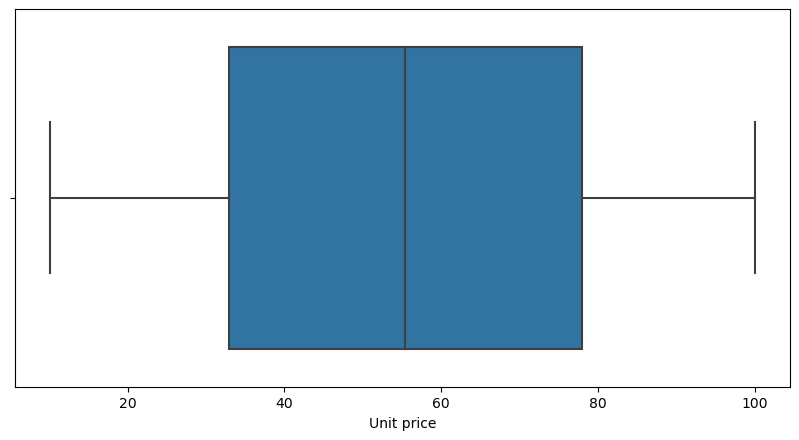

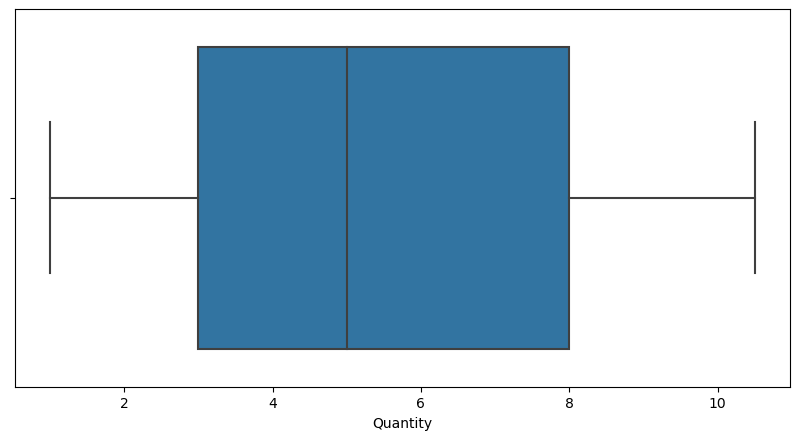

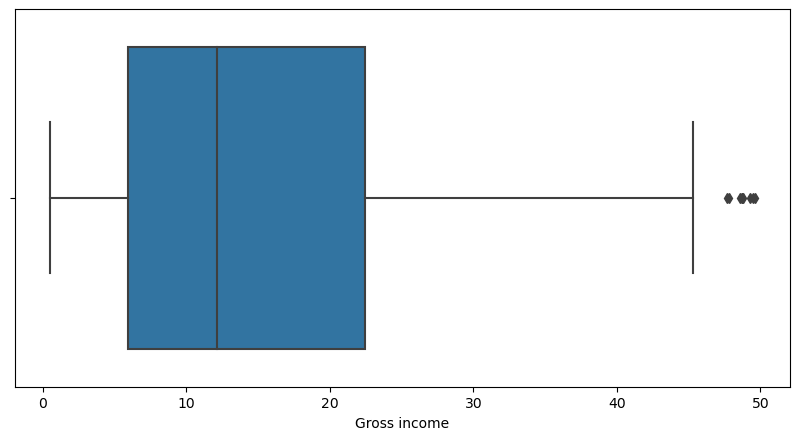

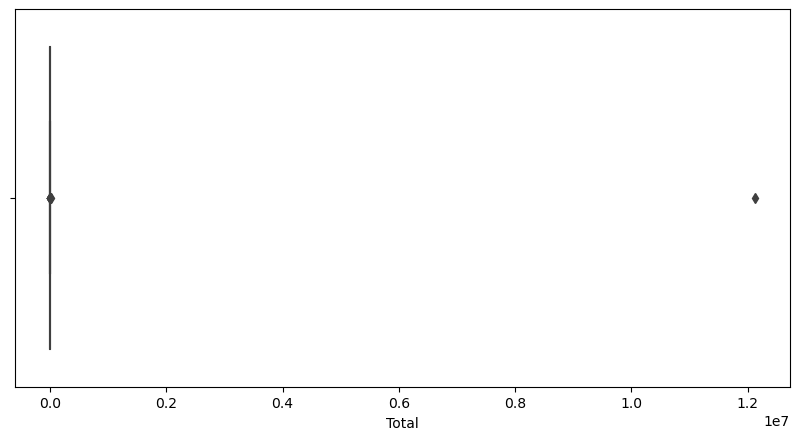

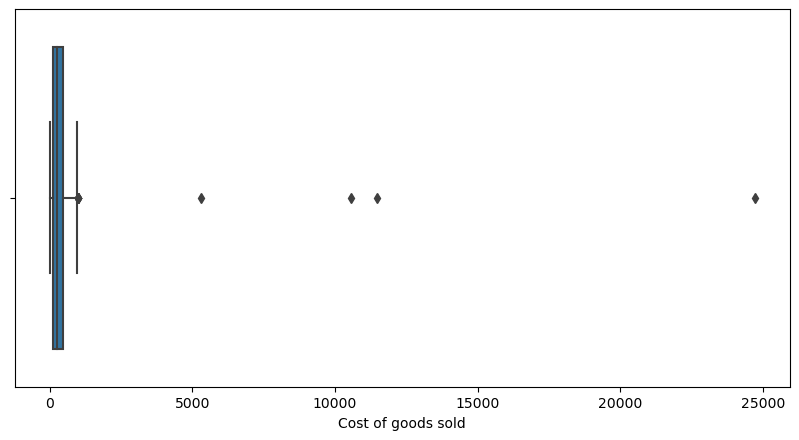

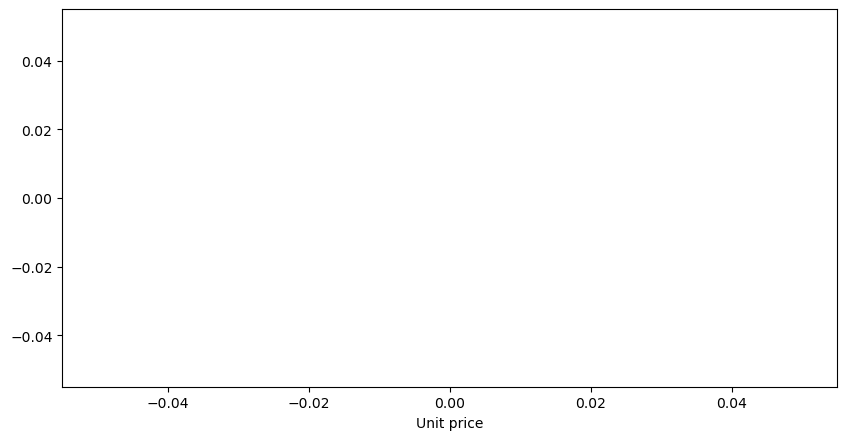

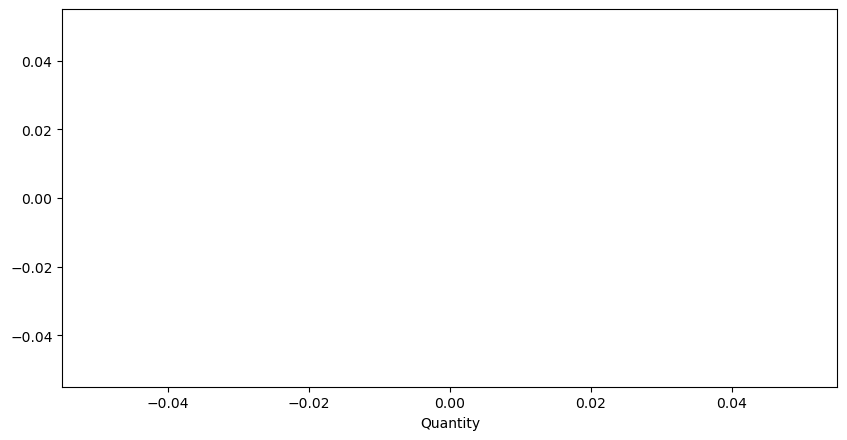

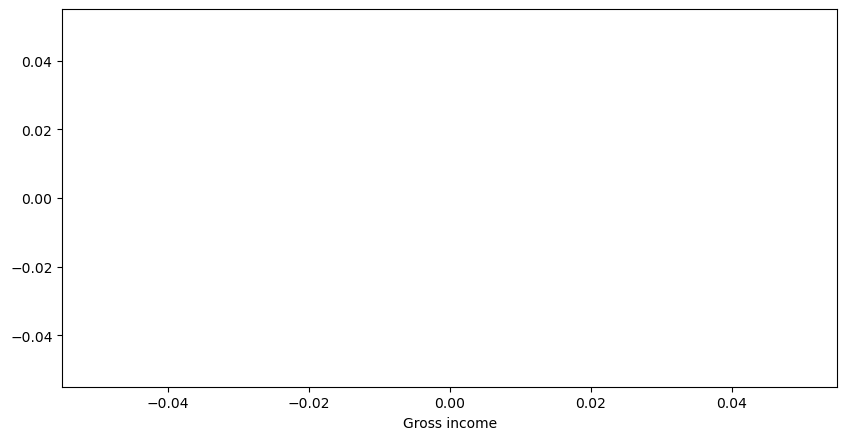

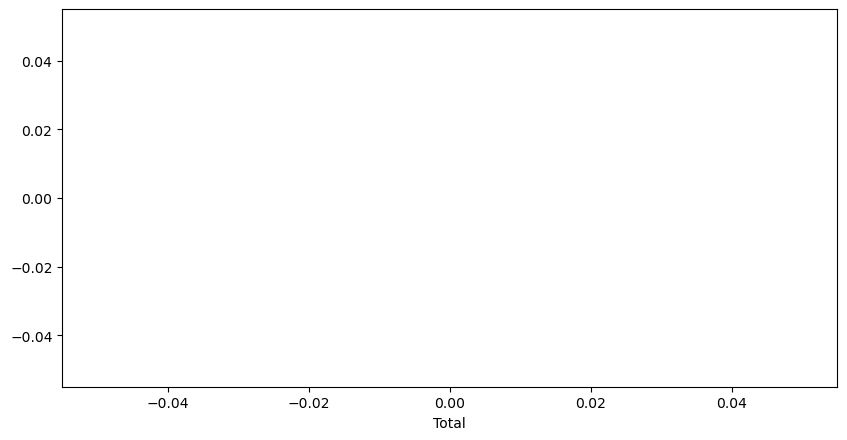

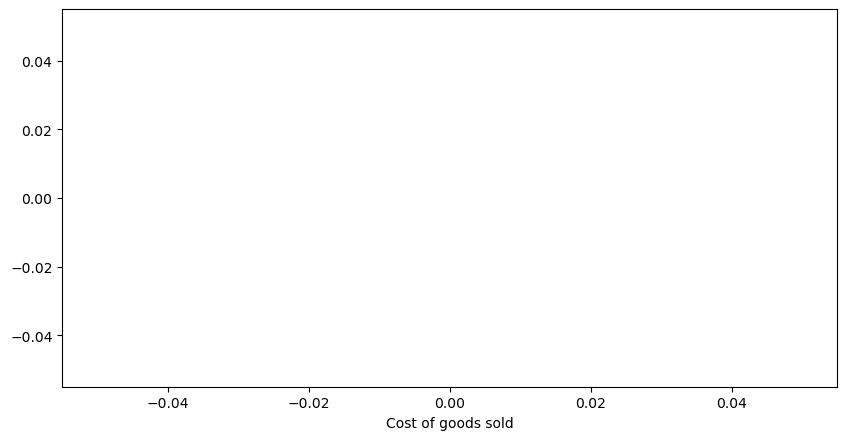

In [61]:
box_plots(numeric,df)
dis_plots(numeric,df)

In [62]:
#To fix the plot of 'Total'
df['Total'].nlargest(10)
#df.head()

19     12121555.0
18        12234.0
350        1042.6
167        1039.3
557        1034.5
699        1023.8
996        1022.5
792        1022.4
422        1020.7
166        1003.6
Name: Total, dtype: float64

In [63]:
df.loc[(df['Total']==12121555.0) | (df['Total'] == 12234.0)]

,City,Customer type,Gender,Product line,Unit price,Quantity,Gross income,Total,Date,Payment,Cost of goods sold,Rating,Quarter,Year,Month,Week,Day
18,Yangon0,Normal,Male,Food and beverages,54.7,3.0,8.2,12234.0,2019-01-21,Credit card,164.0,8.6,Q1,2019,1,4,21
19,Mandalay,Normal,Female,Home and lifestyle,40.3,2.0,4.0,12121555.0,2019-03-11,Ewallet,80.6,4.4,Q1,2019,3,11,11


In [64]:
df.loc[18,'Total']=(df.loc[18,'Unit price']*df.loc[18,'Quantity'])+df.loc[18,'Gross income']
df.loc[19,'Total']=(df.loc[19,'Unit price']*df.loc[19,'Quantity'])+df.loc[19,'Gross income']

In [65]:
df['Cost of goods sold'].mask(df['Cost of goods sold'] > 5000, np.nan, inplace=True)
for index in cost:
    df.loc[index,'Cost of goods sold'] = ((df.loc[index,'Total'])*(df.loc[index,'Gross income']))

In [66]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.69680,26.502803,10.1,32.875,55.40,77.925,100.00
Quantity,1000.0,5.51240,2.925571,1.0,3.000,5.00,8.000,10.50
Gross income,1000.0,15.37900,11.709728,0.5,5.950,12.10,22.425,49.60
Total,1000.0,322.85360,245.841158,10.7,124.450,253.85,471.325,1042.60
Cost of goods sold,1000.0,359.07641,950.395951,10.2,119.650,243.60,454.500,24706.29
Rating,1000.0,6.96880,1.711016,4.0,5.500,7.00,8.400,10.00
Year,1000.0,2018.87900,3.763313,1900.0,2019.000,2019.00,2019.000,2019.00
Month,1000.0,1.99300,0.835254,1.0,1.000,2.00,3.000,3.00
Week,1000.0,6.99700,3.597768,1.0,4.000,7.00,10.000,13.00
Day,1000.0,15.25700,8.689676,1.0,8.000,15.00,23.000,31.00


# Inferential Testing

In [67]:
# T-Test

def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')


In [68]:
t_test(df)

['Unit price', 'Quantity', 'Gross income', 'Total', 'Cost of goods sold', 'Rating', 'Year', 'Month', 'Week', 'Day']

 --------Unit price--------
(Unit price,Quantity) => t-value=59.517804959993654, p-value=0.0
Dependent (reject H0)
(Unit price,Gross income) => t-value=44.00299716270787, p-value=2.701426770786654e-296
Dependent (reject H0)
(Unit price,Total) => t-value=-34.16666144659759, p-value=6.917104188349407e-202
Dependent (reject H0)
(Unit price,Cost of goods sold) => t-value=-10.090507657396776, p-value=2.1875045073686412e-23
Dependent (reject H0)
(Unit price,Rating) => t-value=58.02078441836576, p-value=0.0
Dependent (reject H0)
(Unit price,Year) => t-value=-2319.177541933909, p-value=0.0
Dependent (reject H0)
(Unit price,Month) => t-value=64.04682955930735, p-value=0.0
Dependent (reject H0)
(Unit price,Week) => t-value=57.579801397738905, p-value=0.0
Dependent (reject H0)
(Unit price,Day) => t-value=45.850554550150214, p-value=3.09980318e-314
Dependent (reject H0)

 --------Qu

In [69]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()

# BI and EDA

In [72]:
#Product line which generate highest average gross income
df.groupby('Product line')['Gross income'].mean().idxmax()

'Electronic a'

In [73]:
#product line with highest revenue
print('Product line ', df.iloc[df['Total'].idxmax()]['Product line'], ' Total: ' ,df['Total'].max())

Product line  Fashion accessories  Total:  1042.6


In [74]:
#product line with highest quantity sold
print('Product line: ', df.groupby('Product line')['Quantity'].count().idxmax())
print('Number of products: ', df.groupby('Product line')['Quantity'].count().max())

Product line:  Fashion accessories
Number of products:  179


In [75]:
#Mean total of female
df[df['Gender'] == 'Female']['Total'].mean()

335.98404040404046

In [76]:
df[df['Quantity'] > 10.0].shape[0]

2

C:\Users\Abdullah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of each payment method')

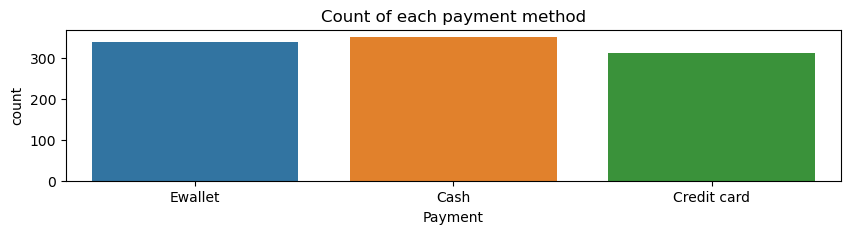

In [77]:
plt.figure(figsize=(10, 2), dpi = 100)
sns.countplot(df['Payment'])
plt.title('Count of each payment method')

Text(0, 0.5, 'Average total')

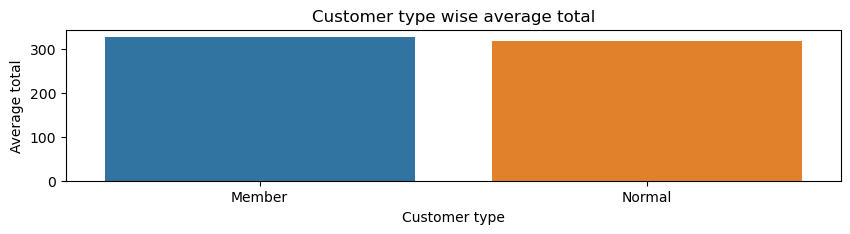

In [78]:
plt.figure(figsize=(10, 2), dpi = 100)
sns.barplot(x = df.groupby('Customer type')['Total'].mean().index, y = df.groupby('Customer type')['Total'].mean().values)
plt.title('Customer type wise average total')
plt.ylabel('Average total')

Text(0.5, 0, 'Average Cost')

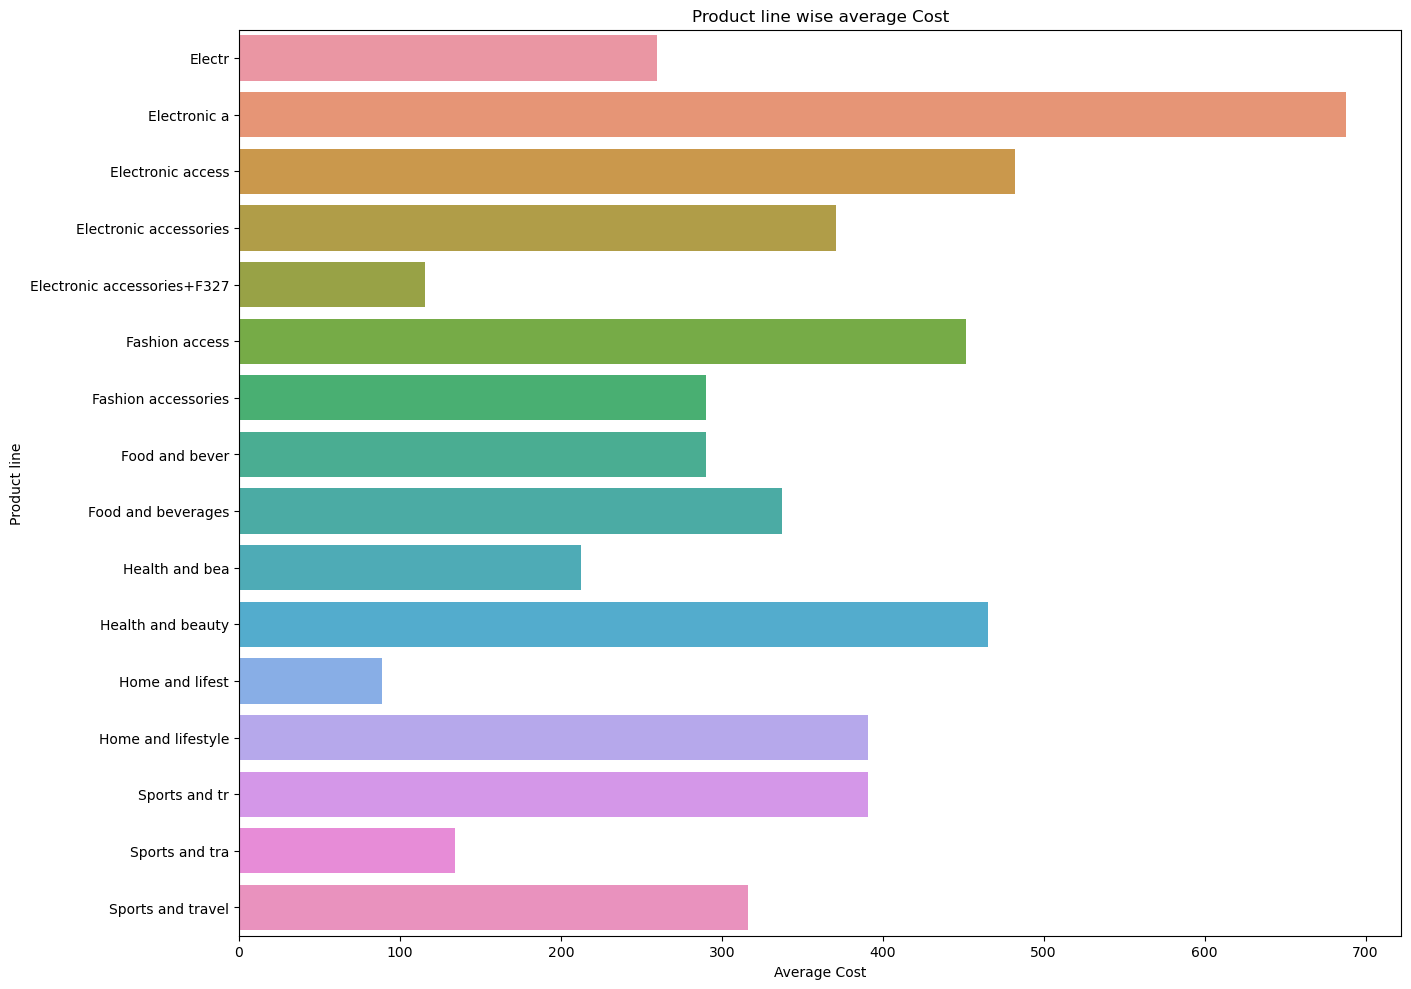

In [79]:
plt.figure(figsize=(15, 12), dpi = 100)
sns.barplot(x = df.groupby('Product line')['Cost of goods sold'].mean().values, y = df.groupby('Product line')['Cost of goods sold'].mean().index)
plt.title('Product line wise average Cost')
plt.xlabel('Average Cost')